# Keras - MNIST 분류하기

In [1]:
import keras

Using TensorFlow backend.


## MNIST 데이터 불러오기

In [2]:
from keras.datasets import mnist

In [3]:
import numpy as np
np.random.seed(777)

In [4]:
# x : 28 x 28 digit Image
# y : Label
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
# 변수 설정
n_train, width, height = x_train.shape
n_test, _, _ = x_test.shape

## 데이터 확인

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

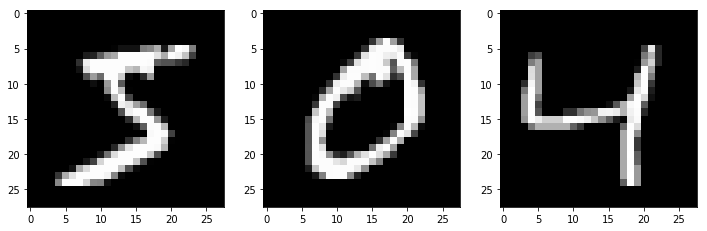

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(x_train[0,], cmap='gray')
plt.subplot(132)
plt.imshow(x_train[1,], cmap='gray')
plt.subplot(133)
plt.imshow(x_train[2,], cmap='gray')

In [11]:
y_train[:23,]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9], dtype=uint8)

## 데이터 전처리

### Input

In [12]:
input_train = x_train.reshape(n_train, width*height) # 28 x 28의 2차원 데이터를 1열의 1차원으로 재정의.
input_train.shape

(60000, 784)

In [13]:
input_train.astype('float32')   # 데이터타입을 실수형으로 변환.

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [14]:
x_train[0][6]

array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
       253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
         0,   0], dtype=uint8)

In [15]:
input_train = input_train / 255.0   # 원본 데이터는 0 ~ 255 색상값으로 되어 있기 때문에 0 ~ 1 범위로 변환.

In [16]:
input_train.max()

1.0

테스트용 데이터도 동일하게 처리

In [17]:
input_test = x_test.reshape(n_test, width*height)
input_test.astype('float32')
input_test = input_test / 255.0

### Output

In [18]:
# Train
output_train = keras.utils.to_categorical(y_train, 10) # 10자리의 리스트. 각 자리를 0 또는 1로 표시. one-hot encoding (dummy coding)

In [19]:
output_train[1]   # = 0 위치가 1 값이기 때문에 0 출력

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [20]:
# Test
output_test = keras.utils.to_categorical(y_test, 10)

## 1. Simple Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [22]:
model = Sequential()
model.add(Dense(392, activation='tanh', input_shape=(784,)))   # activation func.
model.add(Dense(10, activation='softmax'))
model.summary()

# 입력층 784, 은닉층 392, 출력층 10 개 노드.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 311,650.0
Trainable params: 311,650
Non-trainable params: 0.0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',     # losss = cost function
              optimizer=RMSprop(),                 # optimizer
              metrics=['accuracy'])

### Model training

In [24]:
batch_size = 128
epochs = 2

In [25]:
history = model.fit(input_train, output_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (input_test, output_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 12s - loss: 0.3335 - acc: 0.9028 - val_loss: 0.2440 - val_acc: 0.9269
Epoch 2/2
60000/60000 [==============================] - 13s - loss: 0.1745 - acc: 0.9494 - val_loss: 0.1442 - val_acc: 0.9578


In [26]:
history.history

{'acc': [0.90275000003178918, 0.94936666669845582],
 'loss': [0.3335050887266795, 0.17452930697997412],
 'val_acc': [0.92689999999999995, 0.95779999999999998],
 'val_loss': [0.24401760475635528, 0.1441631257534027]}

### Testset Validation

In [27]:
score = model.evaluate(input_test, output_test, verbose=0)  # loss value & metrics value
print('Accuracy :', score[1])

Accuracy : 0.9578


## 2. Model Practices

https://keras.io/optimizers/#parameters-common-to-all-keras-optimizers

In [28]:
nn_model = Sequential()
nn_model.add(Dense(392, activation='relu', input_shape=(784,)))
nn_model.add(Dense(392, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))  # output
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_4 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3930      
Total params: 465,706.0
Trainable params: 465,706
Non-trainable params: 0.0
_________________________________________________________________


In [29]:
from keras.optimizers import SGD, Adagrad, Adadelta, Adam, Adamax, Nadam

In [30]:
batch_size = 128
epochs = 3

### Model 01 - SGD

* Stochastic gradient descent optimizer
* decay : 각 스텝마다 learning rate를 줄여나가는 폭
* nesterov : Nesterov momentum 적용 여부

In [31]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 14s - loss: 0.4346 - acc: 0.8798    
Epoch 2/3
60000/60000 [==============================] - 14s - loss: 0.2006 - acc: 0.9417    
Epoch 3/3
60000/60000 [==============================] - 14s - loss: 0.1466 - acc: 0.9574    

Accuracy : 0.9597


### Model 02 - RMSprop

* learning rate 이외의 옵션은 기본값 유지를 추천한다.
* 일반적으로 RNN (recurrent neural networks)에서 좋은 성능을 보인다.
* rho : 감쇄율
* epsilon : 학습 속도

In [32]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=rmsprop,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 17s - loss: 0.1402 - acc: 0.9583    
Epoch 2/3
60000/60000 [==============================] - 16s - loss: 0.0739 - acc: 0.9771    
Epoch 3/3
60000/60000 [==============================] - 16s - loss: 0.0522 - acc: 0.9843    

Accuracy : 0.9785


### Model 03 - Adagrad

In [33]:
adagrad = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=adagrad,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 16s - loss: 0.0906 - acc: 0.9845    
Epoch 2/3
60000/60000 [==============================] - 16s - loss: 0.0132 - acc: 0.9966    
Epoch 3/3
60000/60000 [==============================] - 16s - loss: 0.0079 - acc: 0.9982    

Accuracy : 0.9841


### Model 04 - Adadelta

In [34]:
adadelta = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=adadelta,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 22s - loss: 0.0055 - acc: 0.9988    
Epoch 2/3
60000/60000 [==============================] - 22s - loss: 0.0040 - acc: 0.9992    
Epoch 3/3
60000/60000 [==============================] - 23s - loss: 0.0032 - acc: 0.9993    

Accuracy : 0.9849


### Model 05 - Adam

* beta_1 & beta_2 : float, 0 < beta < 1. Generally close to 1.

In [35]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=adam,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 20s - loss: 0.0297 - acc: 0.9900    
Epoch 2/3
60000/60000 [==============================] - 19s - loss: 0.0218 - acc: 0.9929    
Epoch 3/3
60000/60000 [==============================] - 19s - loss: 0.0164 - acc: 0.9948    

Accuracy : 0.9831


### Model 06 - Adamax

* variant of Adam based on the infinity norm

In [36]:
adamax = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=adamax,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 17s - loss: 0.0054 - acc: 0.9984    
Epoch 2/3
60000/60000 [==============================] - 17s - loss: 0.0012 - acc: 0.9998    
Epoch 3/3
60000/60000 [==============================] - 17s - loss: 6.6886e-04 - acc: 1.0000    

Accuracy : 0.985


### Model 07 - Nadam

* Nesterov Adam optimizer

In [37]:
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

nn_model.compile(loss='categorical_crossentropy',
                 optimizer=nadam,
                 metrics=['accuracy'])

nn_model.fit(input_train, output_train, 
             batch_size = batch_size,
             epochs = epochs)

score = nn_model.evaluate(input_test, output_test, verbose=0)
print('\nAccuracy :', score[1])

Epoch 1/3
60000/60000 [==============================] - 22s - loss: 0.0438 - acc: 0.9869    
Epoch 2/3
60000/60000 [==============================] - 23s - loss: 0.0311 - acc: 0.9902    
Epoch 3/3
60000/60000 [==============================] - 23s - loss: 0.0276 - acc: 0.9917    

Accuracy : 0.9776
